In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from scipy import stats

# import data

In [2]:
train = pd.read_csv('C:/Users/Dindar/flight_delays/flight-delays-spring-2018/flight_delays_train.csv')
test = pd.read_csv('C:/Users/Dindar/flight_delays/flight-delays-spring-2018/flight_delays_test.csv')
sample = pd.read_csv('C:/Users/Dindar/flight_delays/flight-delays-spring-2018/sample_submission.csv')

In [3]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:

sample.head()

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732


In [5]:
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [6]:
sample.shape, test.shape, train.shape

((100000, 2), (100000, 8), (100000, 9))

In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 41.8 MB


In [8]:
train.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [9]:
train.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [10]:
train.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [11]:
train.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1300
UniqueCarrier          22
Origin                289
Dest                  289
Distance             1310
dep_delayed_15min       2
dtype: int64

# EDA

# dep_delayed_15min

In [12]:
train['dep_delayed_15min'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
train['dep_delayed_15min'] = train['dep_delayed_15min'].map({'N':0, 'Y':1})

In [14]:
train['dep_delayed_15min'].value_counts(normalize=True)

0    0.80956
1    0.19044
Name: dep_delayed_15min, dtype: float64

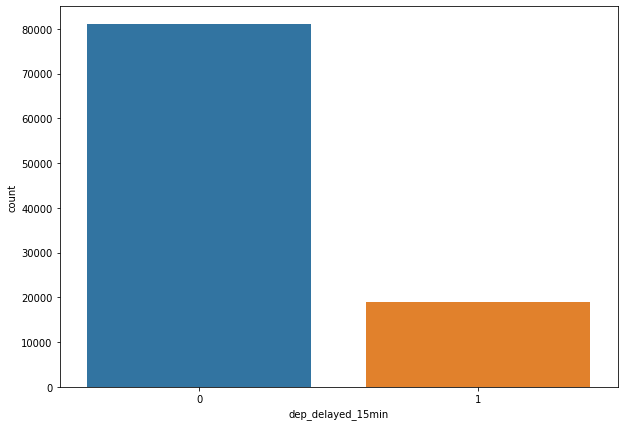

In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(train['dep_delayed_15min'])

# Day of week

In [16]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
train['DayOfWeek'] = train['DayOfWeek'].map(d)

In [17]:
train['DayOfWeek'].value_counts(normalize=True)

4    0.14736
5    0.14657
2    0.14604
1    0.14569
3    0.14508
7    0.14097
6    0.12829
Name: DayOfWeek, dtype: float64

In [18]:
pmf = thinkstats2.Pmf(train['DayOfWeek'])

No handles with labels found to put in legend.


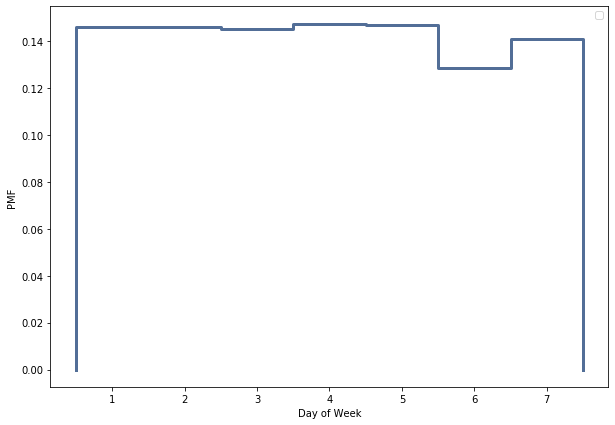

<Figure size 576x432 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel='Day of Week', ylabel='PMF')

In [20]:
yes_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 1.0]['DayOfWeek'], label='1')
no_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 0.0]['DayOfWeek'],  label='0')

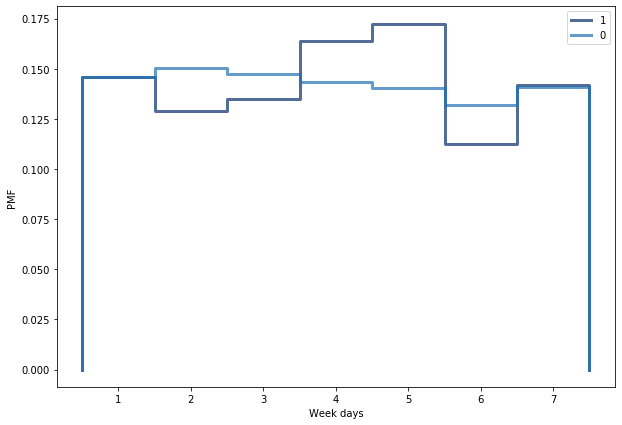

<Figure size 576x432 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Week days', ylabel='PMF')

C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 864x648 with 0 Axes>

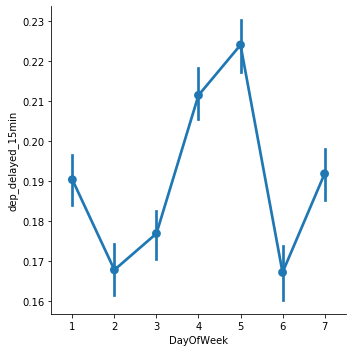

In [22]:
plt.figure(figsize=(12, 9))
sns.factorplot('DayOfWeek', 'dep_delayed_15min', data=train)

# Month

In [23]:
d = {'c-8':8, 'c-4':4, 'c-9':9, 'c-11':11, 'c-10':10, 'c-1':1, 'c-7':7, 'c-6':6, 'c-5':5,
       'c-3':3, 'c-12':12, 'c-2':2}
train['Month'] = train['Month'].map(d)

In [24]:
train['Month'].value_counts()

8     8830
7     8706
3     8595
5     8543
6     8414
4     8408
10    8405
12    8265
11    8178
9     8163
1     8075
2     7418
Name: Month, dtype: int64

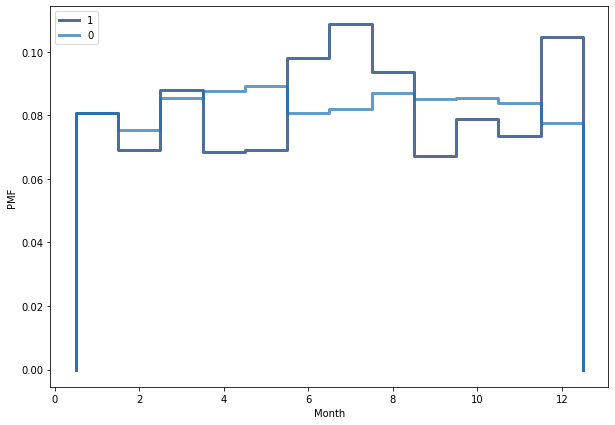

<Figure size 576x432 with 0 Axes>

In [25]:
yes_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 1.0]['Month'], label='1')
no_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 0.0]['Month'],  label='0')
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Month', ylabel='PMF')

C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


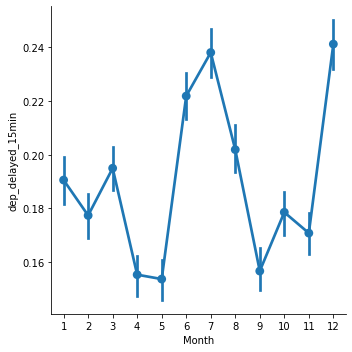

In [26]:
sns.factorplot('Month', 'dep_delayed_15min', data=train)

# Day of month

In [27]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
train['DayofMonth'] = train['DayofMonth'].map(d)

In [28]:
yes_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 1.0]['DayofMonth'], label='1')
no_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 0.0]['DayofMonth'],  label='0')

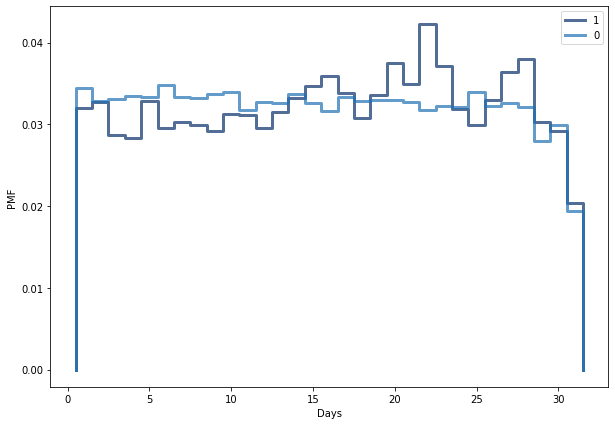

<Figure size 576x432 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Days', ylabel='PMF')

C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


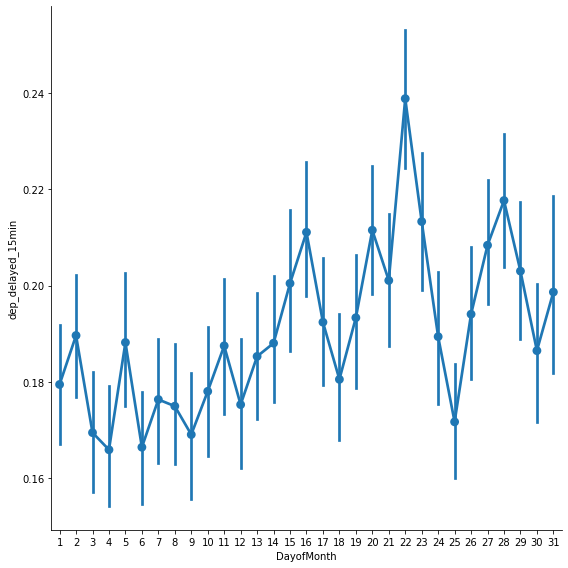

In [30]:
sns.factorplot('DayofMonth', 'dep_delayed_15min', data=train, size=8)

# Deptime - departure time

In [31]:
train['DepTime'].head()

0    1934
1    1548
2    1422
3    1015
4    1828
Name: DepTime, dtype: int64

In [32]:
train['DepTime'].dtypes

dtype('int64')

In [33]:
train['DepTime'].describe()

count    100000.000000
mean       1341.523880
std         476.378445
min           1.000000
25%         931.000000
50%        1330.000000
75%        1733.000000
max        2534.000000
Name: DepTime, dtype: float64

In [34]:
len(train[train['DepTime'] > 2360]['DepTime'].index)

29

In [35]:
d = train[(train['DepTime'] > 2361)&(train['DepTime'] < 2461)]
d1 = train[train['DepTime'] < 61]

In [36]:
d.shape[0], d1.shape[0]

(23, 308)

Text(0.5, 1.0, ' < 61')

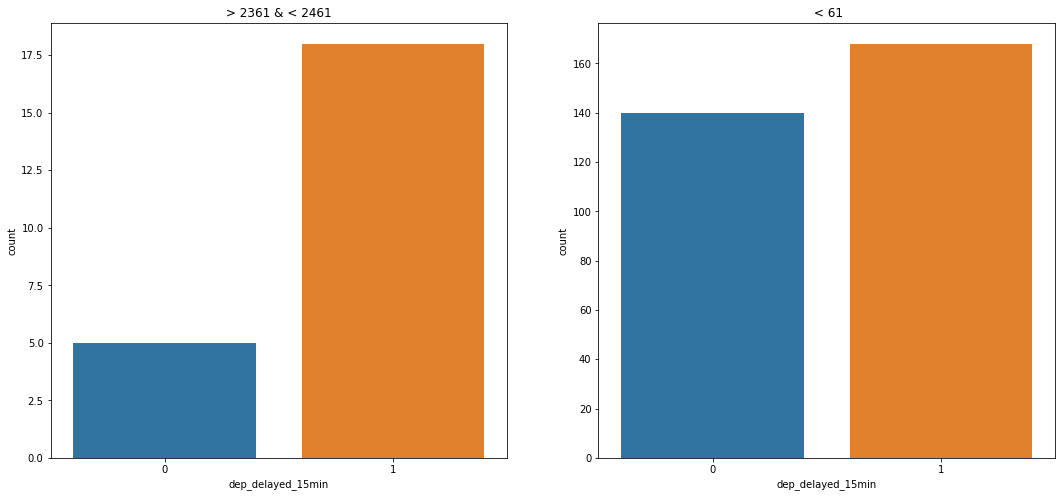

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(d['dep_delayed_15min'], ax = ax[0])
sns.countplot(d1['dep_delayed_15min'], ax = ax[1])
ax[0].set_title(' > 2361 & < 2461 ')
ax[1].set_title(' < 61')

In [38]:
d['dep_delayed_15min'].value_counts(normalize=True)

1    0.782609
0    0.217391
Name: dep_delayed_15min, dtype: float64

In [39]:
d1['dep_delayed_15min'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: dep_delayed_15min, dtype: float64

In [40]:
d2 = train[(train['DepTime'] > 2461)&(train['DepTime'] < 2561)]
d3 = train[(train['DepTime'] > 61)&(train['DepTime'] < 161)]

In [41]:
d2.shape[0], d3.shape[0]

(6, 76)

Text(0.5, 1.0, ' > 61 & < 161 ')

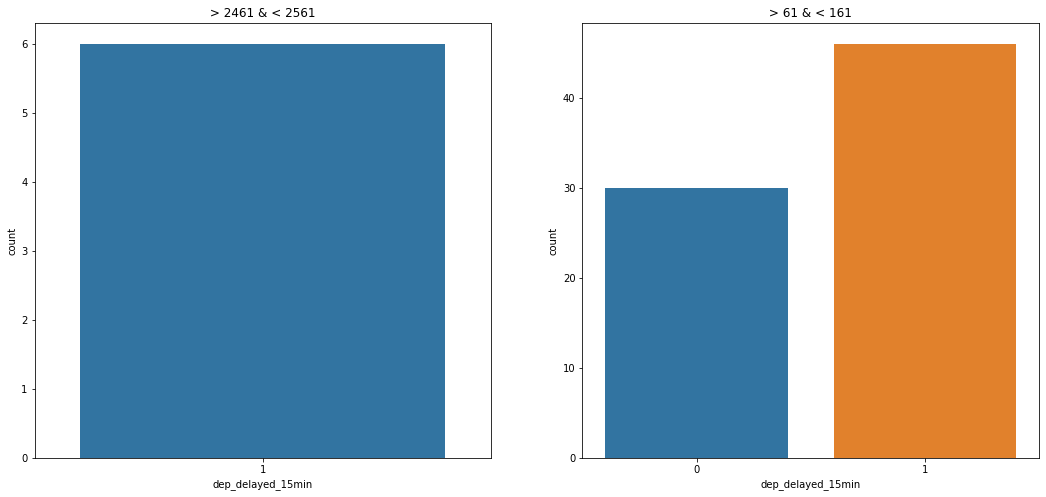

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(d2['dep_delayed_15min'], ax = ax[0])
sns.countplot(d3['dep_delayed_15min'], ax = ax[1])
ax[0].set_title(' > 2461 & < 2561 ')
ax[1].set_title(' > 61 & < 161 ')

In [43]:
indexes = train[train['DepTime'] > 2360]['DepTime'].index

In [44]:
len(indexes)

29

In [45]:
train.drop(axis=0, index=indexes, inplace=True)

In [46]:
train.shape

(99971, 9)

In [47]:
train['depTime']=0
train.loc[train['DepTime']<=61,'depTime']=1
train.loc[(train['DepTime']>61)&(train['DepTime']<=161),'depTime']=2
train.loc[(train['DepTime']>161)&(train['DepTime']<261),'depTime']=3
train.loc[(train['DepTime']>261)&(train['DepTime']<=361),'depTime']=4
train.loc[(train['DepTime']>361)&(train['DepTime']<=461),'depTime']=5
train.loc[(train['DepTime']>461)&(train['DepTime']<=561),'depTime']=6
train.loc[(train['DepTime']>561)&(train['DepTime']<=661),'depTime']=7
train.loc[(train['DepTime']>661)&(train['DepTime']<=761),'depTime']=8
train.loc[(train['DepTime']>761)&(train['DepTime']<=861),'depTime']=9
train.loc[(train['DepTime']>861)&(train['DepTime']<=961),'depTime']=10
train.loc[(train['DepTime']>961)&(train['DepTime']<=1061),'depTime']=11
train.loc[(train['DepTime']>1061)&(train['DepTime']<=1161),'depTime']=12
train.loc[(train['DepTime']>1161)&(train['DepTime']<=1261),'depTime']=13
train.loc[(train['DepTime']>1261)&(train['DepTime']<=1361),'depTime']=14
train.loc[(train['DepTime']>1361)&(train['DepTime']<=1461),'depTime']=15
train.loc[(train['DepTime']>1461)&(train['DepTime']<=1561),'depTime']=16
train.loc[(train['DepTime']>1561)&(train['DepTime']<=1661),'depTime']=17
train.loc[(train['DepTime']>1661)&(train['DepTime']<=1761),'depTime']=18
train.loc[(train['DepTime']>1761)&(train['DepTime']<=1861),'depTime']=19
train.loc[(train['DepTime']>1861)&(train['DepTime']<=1961),'depTime']=20
train.loc[(train['DepTime']>1961)&(train['DepTime']<=2061),'depTime']=21
train.loc[(train['DepTime']>2061)&(train['DepTime']<=2161),'depTime']=22
train.loc[(train['DepTime']>2161)&(train['DepTime']<=2261),'depTime']=23
train.loc[(train['DepTime']>2261)&(train['DepTime']<=2361),'depTime']=24

In [48]:
train.drop('DepTime', axis=1, inplace=True)

In [49]:
train['depTime'].value_counts().sort_index()

1      308
2       76
3       27
4        8
5       38
6     1636
7     6315
8     6329
9     6620
10    6409
11    6363
12    6340
13    6363
14    6178
15    6006
16    6170
17    6112
18    6562
19    6110
20    5500
21    4430
22    3505
23    1787
24     779
Name: depTime, dtype: int64

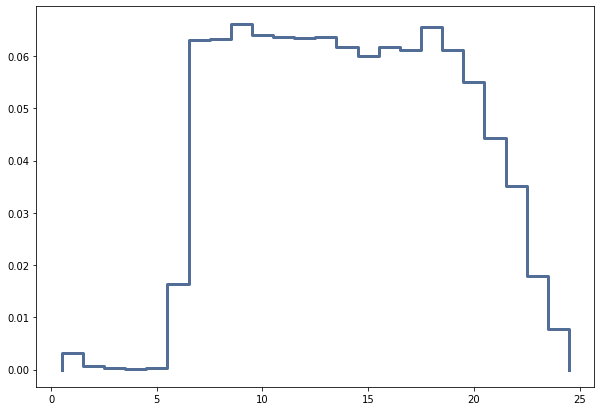

In [50]:
plt.figure(figsize=(10, 7))
pmf = thinkstats2.Pmf(train['depTime'])
thinkplot.Pmf(pmf)

In [51]:
yes_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 1.0]['depTime'], label='1')
no_pmf = thinkstats2.Pmf(train[train['dep_delayed_15min'] == 0.0]['depTime'],  label='0')

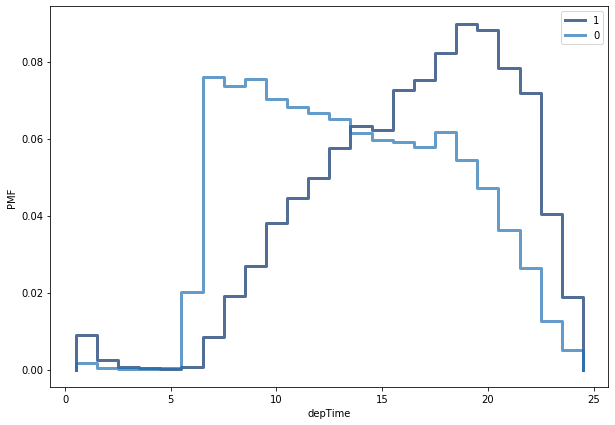

<Figure size 576x432 with 0 Axes>

In [52]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='depTime', ylabel='PMF')

In [53]:
train.groupby('depTime').sum()['dep_delayed_15min'].sort_values(ascending=False)

depTime
19    1709
20    1678
18    1563
21    1491
17    1429
16    1383
22    1368
14    1201
15    1183
13    1093
12     948
11     846
23     770
10     724
9      509
8      361
24     360
1      168
7      159
2       46
3       12
6       11
4        5
5        3
Name: dep_delayed_15min, dtype: int64

# Dest, Origin

In [54]:
train['Dest'].dtypes, train['Origin'].dtypes

(dtype('O'), dtype('O'))

In [55]:
len(train['Dest'].unique()), len(train['Origin'].unique())

(289, 289)

# UniqueCarrier

In [56]:
train['UniqueCarrier'].unique()

array(['AA', 'US', 'XE', 'OO', 'WN', 'NW', 'DL', 'OH', 'AS', 'UA', 'MQ',
       'CO', 'EV', 'DH', 'YV', 'F9', 'AQ', 'TZ', 'HP', 'B6', 'FL', 'HA'],
      dtype=object)

In [57]:
train.groupby('UniqueCarrier').sum()['dep_delayed_15min']

UniqueCarrier
AA    1770
AQ      18
AS     541
B6     392
CO     788
DH     156
DL    1372
EV    1063
F9     156
FL     735
HA      33
HP     195
MQ    1448
NW    1075
OH     808
OO    1277
TZ      64
UA    1321
US    1085
WN    3219
XE    1026
YV     478
Name: dep_delayed_15min, dtype: int64

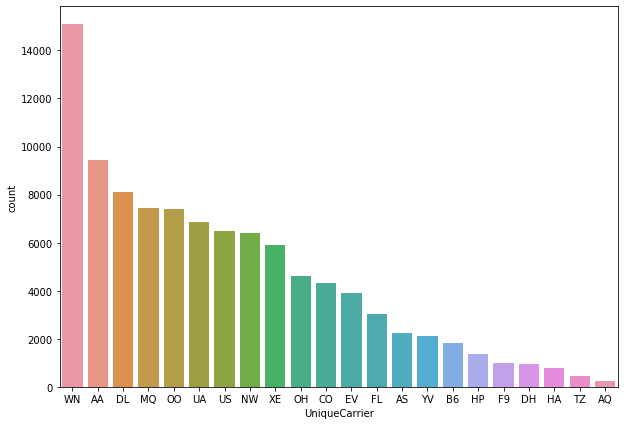

In [58]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=train, order=train['UniqueCarrier'].value_counts().index)

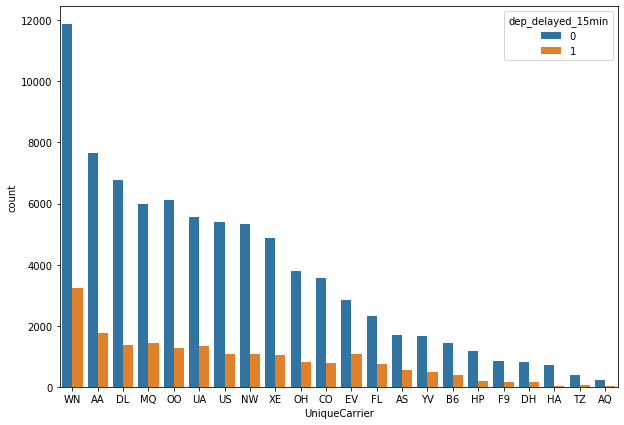

In [59]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=train, hue = 'dep_delayed_15min', order=train['UniqueCarrier'].value_counts().index)

# Distance

In [60]:
train['Distance'].dtypes

dtype('int64')

In [61]:
train['Distance'].describe()

count    99971.000000
mean       729.391944
std        574.541862
min         30.000000
25%        317.000000
50%        575.000000
75%        957.000000
max       4962.000000
Name: Distance, dtype: float64

((array([-4.34595789, -4.14717935, -4.03906206, ...,  4.03906206,
          4.14717935,  4.34595789]),
  array([  30,   31,   31, ..., 4962, 4962, 4962], dtype=int64)),
 (528.4332065238028, 729.3919436636627, 0.9197113475060386))

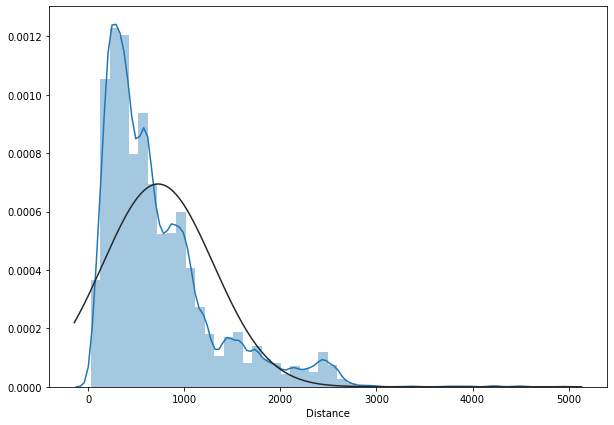

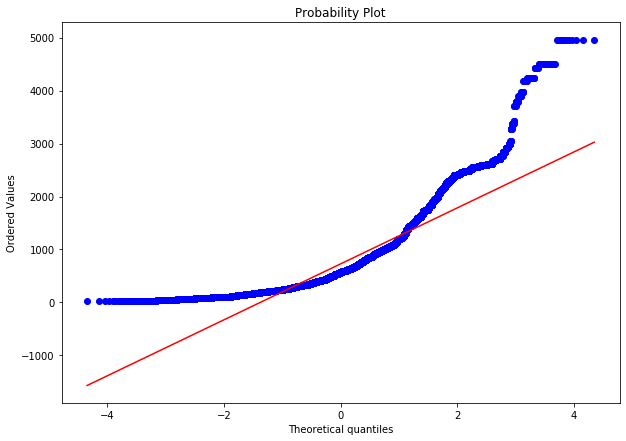

In [62]:
plt.figure(figsize=(10, 7))
sns.distplot(train['Distance'], fit=stats.norm)
plt.figure(figsize=(10, 7))
stats.probplot(train['Distance'], plot=plt)

In [63]:
train['Distance'] = np.log(train['Distance'])

In [64]:
train.head(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,depTime
0,8,21,7,AA,ATL,DFW,6.595781,0,20
1,4,20,3,US,PIT,MCO,6.726233,0,16
2,9,2,5,XE,RDU,CLE,6.030685,0,15


# get_dummies

In [124]:
train = pd.get_dummies(data=train, columns=['Month','DayofMonth','DayOfWeek','UniqueCarrier','Origin','Dest','depTime'])

In [411]:
train = pd.get_dummies(data=train, columns=['Month','DayofMonth','DayOfWeek','depTime'])

In [ ]:
train.drop(['Origin','Dest', 'UniqueCarrier'], axis=1, inplace=True)

In [65]:
train = pd.get_dummies(data=train, columns=['Month','DayofMonth','DayOfWeek','UniqueCarrier','depTime'])

In [66]:
train.drop(['Origin','Dest'], axis=1, inplace=True)

In [67]:
train.shape

(99971, 98)

# split x, y

In [68]:
x = train.drop(['dep_delayed_15min'], axis=1)
y = train['dep_delayed_15min']

In [69]:
x.shape, y.shape

((99971, 97), (99971,))

# Standard scaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [72]:
y = y.values

In [73]:
type(y)

numpy.ndarray

# train test split

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.4, random_state = 123, stratify = y)

In [76]:
print('X_train shape is :', X_train.shape, '\ny_train shape is ',y_train.shape)

X_train shape is : (59982, 97) 
y_train shape is  (59982,)


# For my dataset to evaluate algorithm i use recall. Because it will be better for me if I will predict that fligths will delays than no delays. But competition evaluation metric is roc auc. Therefore I will consider.

# GaussianNB

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [78]:
%%time
gaus = GaussianNB()
gaus.fit(X_train,y_train)

Wall time: 124 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
%%time
y_preds = gaus.predict(X_test)

Wall time: 114 ms


In [80]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.40568656380504636


In [81]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.29      0.44     32381
           1       0.23      0.92      0.37      7608

    accuracy                           0.41     39989
   macro avg       0.58      0.60      0.40     39989
weighted avg       0.80      0.41      0.42     39989



In [82]:
roc_auc_score(y_test, y_preds)

0.6019027515973638

# BernoulliNB

In [83]:
from sklearn.naive_bayes import BernoulliNB

In [84]:
%%time
bern = BernoulliNB()
bern.fit(X_train,y_train)

Wall time: 80 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [85]:
%%time
y_preds = bern.predict(X_test)

Wall time: 40.6 ms


In [86]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.8116231963790043


In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89     32381
           1       0.55      0.05      0.10      7608

    accuracy                           0.81     39989
   macro avg       0.68      0.52      0.50     39989
weighted avg       0.77      0.81      0.74     39989



In [88]:
roc_auc_score(y_test, y_preds)

0.5211189053757979

# MultinomialNB

In [93]:
from sklearn.naive_bayes import MultinomialNB

### normalize

In [89]:
from sklearn.preprocessing import Normalizer

In [90]:
normalize = Normalizer()
x_nor = normalize.fit_transform(x)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x_nor, y, test_size = 0.4, random_state = 123, stratify = y)

In [94]:
%%time
multi = MultinomialNB()
multi.fit(X_train,y_train)

Wall time: 20.6 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
%%time
y_preds = multi.predict(X_test)

Wall time: 10.1 ms


In [96]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.8097476806121684


In [97]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     32381
           1       0.00      0.00      0.00      7608

    accuracy                           0.81     39989
   macro avg       0.40      0.50      0.45     39989
weighted avg       0.66      0.81      0.72     39989



C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
roc_auc_score(y_test, y_preds)

0.5

# overs sampling(smote)

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
%%time
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

Wall time: 21.4 s


In [101]:
X_res.shape, X_train.shape

((97140, 97), (59982, 97))

In [102]:
np.unique(y_res, return_counts=True)

(array([0, 1], dtype=int64), array([48570, 48570], dtype=int64))

### BernoulliNB with smote

In [103]:
%%time
bern = BernoulliNB()
bern.fit(X_res, y_res)

Wall time: 132 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [104]:
%%time
y_preds = bern.predict(X_test)

Wall time: 54.5 ms


In [105]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.6584560754207407


In [106]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     32381
           1       0.30      0.61      0.41      7608

    accuracy                           0.66     39989
   macro avg       0.59      0.64      0.58     39989
weighted avg       0.77      0.66      0.69     39989



In [107]:
roc_auc_score(y_test, y_preds)

0.6413846066342536

### MultinomialNB with smote

In [108]:
%%time
multi = MultinomialNB()
multi.fit(X_res, y_res)

Wall time: 40.1 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [109]:
%%time
y_preds = multi.predict(X_test)

Wall time: 10.1 ms


In [110]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.6146940408612368


In [111]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.60      0.71     32381
           1       0.29      0.70      0.41      7608

    accuracy                           0.61     39989
   macro avg       0.59      0.65      0.56     39989
weighted avg       0.78      0.61      0.66     39989



In [112]:
roc_auc_score(y_test, y_preds)

0.6461892835892424

# over sampling (adasyn)

In [113]:
from imblearn.over_sampling import ADASYN

In [114]:
%%time
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

Wall time: 2min 15s


In [115]:
X_res.shape, X_train.shape

((99337, 97), (59982, 97))

In [116]:
np.unique(y_res, return_counts=True)

(array([0, 1], dtype=int64), array([48570, 50767], dtype=int64))

### BernoulliNB with adasyn

In [117]:
%%time
bern = BernoulliNB()
bern.fit(X_res, y_res)

Wall time: 122 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [118]:
%%time
y_preds = bern.predict(X_test)

Wall time: 44.8 ms


In [119]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.6443521968541349


In [120]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     32381
           1       0.30      0.64      0.41      7608

    accuracy                           0.64     39989
   macro avg       0.59      0.64      0.58     39989
weighted avg       0.77      0.64      0.68     39989



In [121]:
roc_auc_score(y_test, y_preds)

0.6426310657633706

### MultinomialNB with adasyn

In [122]:
%%time
multi = MultinomialNB()
multi.fit(X_res, y_res)

Wall time: 31.9 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
%%time
y_preds = multi.predict(X_test)

Wall time: 8.08 ms


In [124]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.510090274825577


In [125]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.44      0.59     32381
           1       0.26      0.83      0.39      7608

    accuracy                           0.51     39989
   macro avg       0.59      0.63      0.49     39989
weighted avg       0.79      0.51      0.55     39989



In [126]:
roc_auc_score(y_test, y_preds)

0.6315261240778376

# random undersampling

In [127]:
from imblearn.under_sampling import RandomUnderSampler

In [128]:
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(X_train, y_train)

In [129]:
x_res.shape, y_res.shape

((22824, 97), (22824,))

### BernoulliNB with undersampling

In [130]:
%%time
bern = BernoulliNB()
bern.fit(x_res, y_res)

Wall time: 28.4 ms


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [131]:
%%time
y_preds = bern.predict(X_test)

Wall time: 40.5 ms


In [132]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.6118682637725374


In [133]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     32381
           1       0.29      0.70      0.41      7608

    accuracy                           0.61     39989
   macro avg       0.59      0.65      0.56     39989
weighted avg       0.78      0.61      0.65     39989



In [134]:
roc_auc_score(y_test, y_preds)

0.6457516908712839

### MultinomialNB with undersampling

In [135]:
%%time
multi = MultinomialNB()
multi.fit(x_res, y_res)

Wall time: 5.05 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [136]:
%%time
y_preds = multi.predict(X_test)

Wall time: 2.04 ms


In [137]:
print('accuracy is: ',accuracy_score(y_test, y_preds))

accuracy is:  0.6114681537422791


In [138]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     32381
           1       0.29      0.70      0.41      7608

    accuracy                           0.61     39989
   macro avg       0.59      0.65      0.56     39989
weighted avg       0.78      0.61      0.65     39989



In [139]:
roc_auc_score(y_test, y_preds)

0.6463090986616985

### GaussianNB with undersampling

In [140]:
%%time
gaus = GaussianNB()
gaus.fit(x_res, y_res)

Wall time: 44.8 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
%%time
y_preds = gaus.predict(X_test)

Wall time: 112 ms


In [142]:
roc_auc_score(y_test, y_preds)

0.6432579181538316

# among algorithms i prefer simple GaussianNB. Because, recal is the highest 92%. And this model is built on original data without oversampling and undersampling